In [3]:
dpath = '/data/image_captioning/flikr8/Flicker8k_Dataset/'

In [326]:
from torchvision.models import inception_v3
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.autograd import Variable
from torch.utils.data import DataLoader
from glob import glob
from PIL import Image
import pdb
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [374]:
BATCH_SIZE=4
mu = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
scaleCrop = transforms.Compose([transforms.Scale(299), transforms.CenterCrop((299, 299))])

norm = transforms.Normalize(mean=mu,std=std)
mu_rev = torch.FloatTensor(mu).unsqueeze(1).unsqueeze(1)
std_rev = torch.FloatTensor(std).unsqueeze(1).unsqueeze(1)
preproc = transforms.Compose([scaleCrop, transforms.ToTensor(), norm])
denorm = transforms.Lambda(lambda x: (x * torch.FloatTensor(std_rev)) + torch.FloatTensor(mu_rev))
revTrans = transforms.Compose([denorm, transforms.ToPILImage()])

In [366]:
net = inception_v3(pretrained=True)

/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/torchvision-0.1.9-py3.6.egg/torchvision/models/inception.py:65: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  m.weight.data.copy_(values)


In [377]:
targ_layer = net._modules.get('Mixed_7c')
out = torch.zeros([BATCH_SIZE, 2048, 8, 8])
def fun(m, i, o): out.copy_(o.data)
h = targ_layer.register_forward_hook(fun)

In [378]:
ds = ImageFolder(dpath, transform=preproc)
ds.imgs = [(path, int(clazz)) for path, clazz in np.random.permutation(ds.imgs)]
dl = DataLoader(ds,batch_size=BATCH_SIZE)


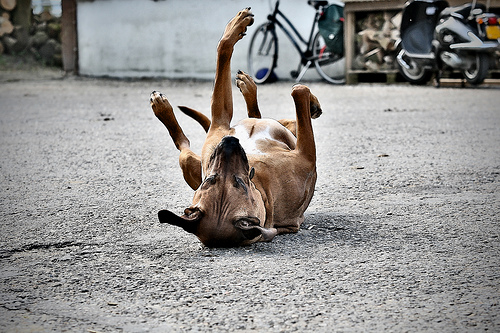

In [380]:
Image.open(ds.imgs[0][0])

In [381]:
def testRev(batch):
    img = batch[0, :, :, :]
    return revTrans(img)

In [382]:
for batch, _ in dl:
    __ = net(Variable(batch))
    pdb.set_trace()

> <ipython-input-382-9721b79e8b8b>(1)<module>()
-> for batch, _ in dl:
(Pdb) rev = testRev(batch)
(Pdb) exit


BdbQuit: 

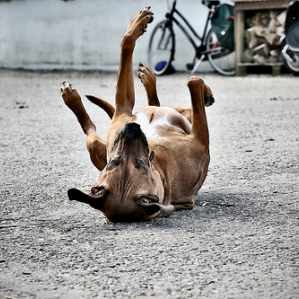

In [383]:
rev